# Bumble App Store Reviews - NLP Classification

In this project, I explore Bumble reviews on the Apple app store. Here I make a model which can predict if a review is going to be positive or negative. I start by importing the key data analysis libraries and the tools to scrape the app store reviews from Bumble US.

In [1]:
#Importing the important data analysis libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Here I import json and the app store scraper
import json
from app_store_scraper import AppStore

#Scraping the reviews from the app store for Bumble US
bumbleus = AppStore(country='us', app_name='bumble', app_id = '930441707')

#Here I'm going to consider 2000 reviews 
bumbleus.review(how_many=2000)

2023-09-06 07:57:09,082 [INFO] Base - Initialised: AppStore('us', 'bumble', 930441707)
2023-09-06 07:57:09,083 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/bumble/id930441707
2023-09-06 07:57:14,216 [INFO] Base - [id:930441707] Fetched 460 reviews (460 fetched in total)
2023-09-06 07:57:19,614 [INFO] Base - [id:930441707] Fetched 980 reviews (980 fetched in total)
2023-09-06 07:57:24,937 [INFO] Base - [id:930441707] Fetched 1480 reviews (1480 fetched in total)
2023-09-06 07:57:30,198 [INFO] Base - [id:930441707] Fetched 1960 reviews (1960 fetched in total)
2023-09-06 07:57:30,648 [INFO] Base - [id:930441707] Fetched 2000 reviews (2000 fetched in total)


Here I set up the data frame.

In [2]:
#To a data frame 
bumbleusdf = pd.DataFrame(np.array(bumbleus.reviews),columns=['review'])
#Split the current data frame into columns
bumbleusdf2 = bumbleusdf.join(pd.DataFrame(bumbleusdf.pop('review').tolist()))
#Head of the data frame
bumbleusdf2.head()

,date,developerResponse,review,rating,isEdited,userName,title
0,2023-03-10 06:17:48,"{'id': 35331587, 'body': 'Thank you for your f...","And that’s not saying much. However, I do enjo...",4,False,Tay$76$@,More Success Than Other Apps
1,2023-08-15 14:14:55,"{'id': 38349729, 'body': 'We're sorry you didn...",When will they figure out how to make swiping ...,2,False,sceprent,Really bad app.
2,2021-02-07 22:21:22,"{'id': 22222509, 'body': 'You don't have to pa...","This app is good for meeting new people, howev...",3,False,TDROID$$!!!,"Not bad, but needs work"
3,2022-06-27 00:59:59,NaN,I don’t use the apps much but during Covid and...,3,False,cinderella455,It’s okay
4,2021-12-29 03:22:18,"{'id': 27544813, 'body': 'Thank you so much fo...",I have been a Bumble user for quite sometime n...,1,False,Geebtron3000,Awful Customer Service Scam Subscriptions


Next, I look at some of the info and stats of the data frame.

In [3]:
#Some info on the data frame 
bumbleusdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               2000 non-null   datetime64[ns]
 1   developerResponse  1618 non-null   object        
 2   review             2000 non-null   object        
 3   rating             2000 non-null   int64         
 4   isEdited           2000 non-null   bool          
 5   userName           2000 non-null   object        
 6   title              2000 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 95.8+ KB


In [4]:
#Some stats on the ratings column
bumbleusdf2.describe()

,rating
count,2000.00000
mean,2.30050
std,1.44369
min,1.00000
25%,1.00000
50%,2.00000
75%,3.00000
max,5.00000


At the moment I won't consider three of the columns.

In [5]:
#Dropping 3 of the columns
bumbleusdf2.drop(['developerResponse','isEdited','userName'],axis=1,inplace=True)

In [6]:
#Head of the data frame after dropping the three columns
bumbleusdf2.head()

,date,review,rating,title
0,2023-03-10 06:17:48,"And that’s not saying much. However, I do enjo...",4,More Success Than Other Apps
1,2023-08-15 14:14:55,When will they figure out how to make swiping ...,2,Really bad app.
2,2021-02-07 22:21:22,"This app is good for meeting new people, howev...",3,"Not bad, but needs work"
3,2022-06-27 00:59:59,I don’t use the apps much but during Covid and...,3,It’s okay
4,2021-12-29 03:22:18,I have been a Bumble user for quite sometime n...,1,Awful Customer Service Scam Subscriptions


Looking at the data frame it appears to have a lot more negative reviews than positive reviews. There are close to 900 ratings of 1.

<AxesSubplot:xlabel='rating', ylabel='count'>

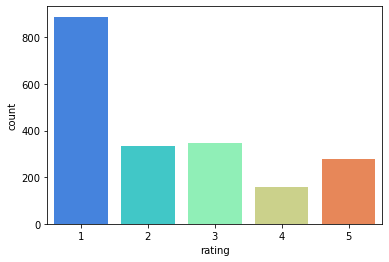

In [7]:
#A countplot of the ratings
sns.countplot(x='rating',data=bumbleusdf2,palette='rainbow')

Here I will add two columns to the data frame which are the length of the review and title, respectfully.

In [8]:
#Now I'm going to make a new column with the review length
bumbleusdf2['review_length'] = bumbleusdf2['review'].apply(len)

In [9]:
#Now I am going to do the same but with the title length
bumbleusdf2['title_length'] = bumbleusdf2['title'].apply(len)

In [10]:
#New data frame with the review length and title length features
bumbleusdf2.head()

,date,review,rating,title,review_length,title_length
0,2023-03-10 06:17:48,"And that’s not saying much. However, I do enjo...",4,More Success Than Other Apps,1249,28
1,2023-08-15 14:14:55,When will they figure out how to make swiping ...,2,Really bad app.,1474,15
2,2021-02-07 22:21:22,"This app is good for meeting new people, howev...",3,"Not bad, but needs work",1354,23
3,2022-06-27 00:59:59,I don’t use the apps much but during Covid and...,3,It’s okay,1348,9
4,2021-12-29 03:22:18,I have been a Bumble user for quite sometime n...,1,Awful Customer Service Scam Subscriptions,1431,41


I want to see if there is any correlation between the lengths of the review or title and the rating.

In [11]:
#Correlations between rating, review_length and title_length
bumbleusdf2.corr(numeric_only=True)

,rating,review_length,title_length
rating,1.000000,-0.400875,-0.148623
review_length,-0.400875,1.000000,0.063001
title_length,-0.148623,0.063001,1.000000


<AxesSubplot:>

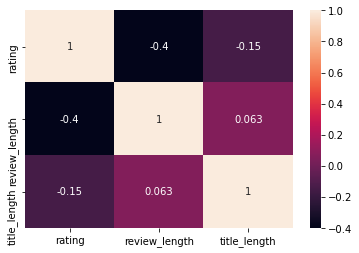

In [12]:
#A heatmap of the above correlations
sns.heatmap(bumbleusdf2.corr(numeric_only=True),annot=True)

It appears that the longer a review is the lower the rating. 

<AxesSubplot:xlabel='rating', ylabel='review_length'>

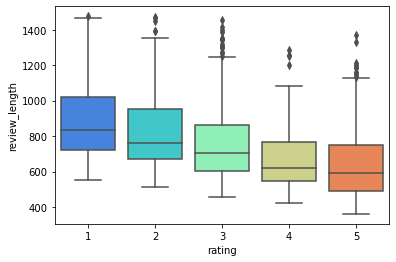

In [13]:
#A box plot of the review_length for different ratings 
sns.boxplot(x='rating',y='review_length',data=bumbleusdf2,palette='rainbow')

A similar negative correlation between the length of the title and rating also exists but to a lesser extent.

<AxesSubplot:xlabel='rating', ylabel='title_length'>

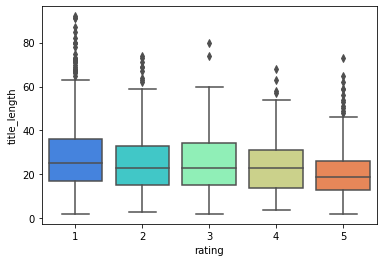

In [14]:
#A box plot of the title_length for different ratings
sns.boxplot(x='rating',y='title_length',data=bumbleusdf2,palette='rainbow')

In [15]:
#Mean of the title_length and review_length grouping by rating
ratings_numeric_mean = bumbleusdf2.groupby(by='rating').mean(numeric_only=True)
ratings_numeric_mean

,review_length,title_length
rating,,
1,890.694820,28.032658
2,828.237952,25.762048
3,763.152738,25.547550
4,678.522293,23.770701
5,647.764493,21.673913


Now I make a function which I can use to make a new column in my data frame. This new column is 1 if the rating is 4 or 5 and 0 if the rating is 1, 2 or 3. 

In [16]:
#A function which returns 1 if x is 4 or more and 0 if x is less than 4
def fourormore(x):
    if x >= 4:
        y = 1
    else:
        y = 0
    return y

In [17]:
#Adding a new column called 4_or_more
bumbleusdf2['4_or_more'] =  bumbleusdf2['rating'].apply(fourormore)

In [18]:
#The new data frame head
bumbleusdf2.head()

,date,review,rating,title,review_length,title_length,4_or_more
0,2023-03-10 06:17:48,"And that’s not saying much. However, I do enjo...",4,More Success Than Other Apps,1249,28,1
1,2023-08-15 14:14:55,When will they figure out how to make swiping ...,2,Really bad app.,1474,15,0
2,2021-02-07 22:21:22,"This app is good for meeting new people, howev...",3,"Not bad, but needs work",1354,23,0
3,2022-06-27 00:59:59,I don’t use the apps much but during Covid and...,3,It’s okay,1348,9,0
4,2021-12-29 03:22:18,I have been a Bumble user for quite sometime n...,1,Awful Customer Service Scam Subscriptions,1431,41,0


Two histograms with the review lengths on the x-axis. The first histogram is for reviews with a ratings less than 4 and the second histogram is for ratings of 4 or more.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

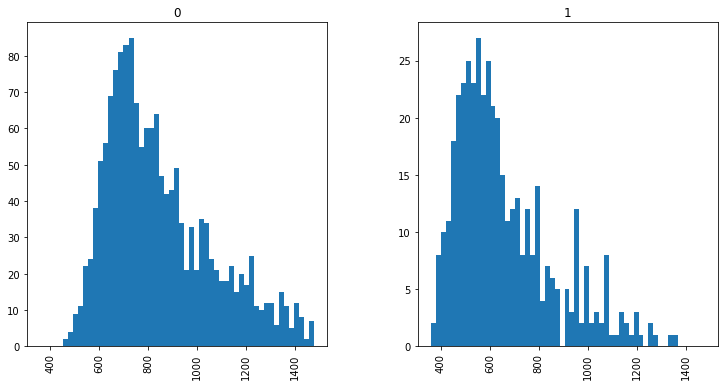

In [19]:
#Histogram of review_length with a split on weather or not the review got at 4 or more star review
bumbleusdf2.hist(column='review_length',by='4_or_more',bins=50,figsize=(12,6),sharex=True)

Two histograms with the title lengths on the x-axis. The first histogram is for reviews with a ratings less than 4 and the second histogram is for ratings of 4 or more.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

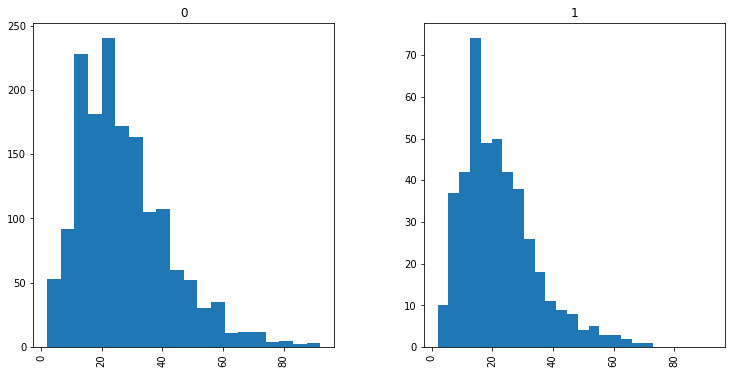

In [20]:
#Histogram of title_length with a split on weather or not the review got at 4 or more star review
bumbleusdf2.hist(column='title_length',by='4_or_more',bins=20,figsize=(12,6),sharex=True)

## First model with Naive Bayes

Now I begin by looking at my first model. Which is going to be a Naive Bayes model.

In [21]:
#Spliting the data into X and y here looking at the review and 4_or_more columns
X = bumbleusdf2['review']
y = bumbleusdf2['4_or_more']

Here I use a count vectotizer to count the number of times a word appears in the reviews.

In [22]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
#Instance of CountVectorizer
cv = CountVectorizer()

In [24]:
#Fit and transform X with the CountVectorizer
X = cv.fit_transform(X)

Importing the train test split and multinomial Naive Bayes.

In [25]:
#Train test split
from sklearn.model_selection import train_test_split

In [26]:
#The split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
#Import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

Now I make an instance of MultinomialNB, fit the model to the training data and get the predictions for the test data.

In [28]:
#Instance of MultinomialNB
nb = MultinomialNB()

In [29]:
#Fit MultinomialNB to training data
nb.fit(X_train,y_train)

MultinomialNB()

In [30]:
#Get predictions on the test data
predictions = nb.predict(X_test)

Now using sklearn's classification report and confusion matrix I can evaluate the models performance. 

In [31]:
#Import classifcation report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [32]:
#Classification report and confusion matrix
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       469
           1       0.75      0.36      0.48       131

    accuracy                           0.83       600
   macro avg       0.79      0.66      0.69       600
weighted avg       0.82      0.83      0.81       600



[[453  16]
 [ 84  47]]


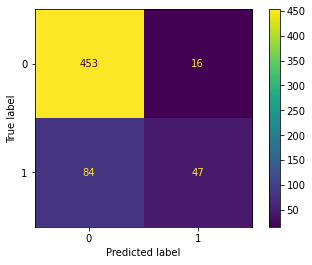

In [33]:
#Display of the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,predictions))
disp.plot();

## New model - Using string, stopwords, TfidfTransformer and Random Forests

This time I create a model but remove any punctuation and stopwords before hand. Also I replace the Naive Bayes with a Random Forest model. First I import the nltk and string libraries. Additionally, I import stopwords from nltk. 

In [34]:
#Importing nltk
import nltk

In [35]:
#nltk.download_shell()

In [36]:
#Importing string
import string

Here I will show an example of what I am going to do to the text in reviews.

In [37]:
#Using this for an example to show how to my use of sting and stopwords
mess = 'Hello my name is Lewis!'

In [38]:
#This will get rid of the puncuation in mess
nopunc = [c for c in mess if c not in string.punctuation]

In [39]:
#No puncuation here
nopunc

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'm',
 'y',
 ' ',
 'n',
 'a',
 'm',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'L',
 'e',
 'w',
 'i',
 's']

In [40]:
#Importing stopwords
from nltk.corpus import stopwords

In [41]:
#The list of English stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
#Joining the characters in nopunc
nopunc = ''.join(nopunc)

In [43]:
#List of words
nopunc.split()

['Hello', 'my', 'name', 'is', 'Lewis']

In [44]:
#Removing the stop words in nopunc
[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

['Hello', 'name', 'Lewis']

So now I combine these processes into a single function which I can use on my data frame.

In [45]:
#This is the text processing function which I will use for my analyser in my count vectorizer
def text_process(message):
    '''
    1. Remove punc
    2. Remove stopwords
    3. Return a list of clean words
    '''
    nopunc = [char for char in message if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Now I import the TfidfTransformer, the Pipeline and the RandomForestClassifier from sklearn.

In [46]:
#TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer

In [47]:
#Here we again split the data and use the train test split
X = bumbleusdf2['review']
y = bumbleusdf2['4_or_more']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
#Import Pipeline
from sklearn.pipeline import Pipeline

In [49]:
#Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

All that is left to do is to make the pipeline, fit it to the training data and make the predictions on the test data.

In [50]:
#Make the pipeline
pipe = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                 ('tfidf',TfidfTransformer()),
                 ('classifier',RandomForestClassifier())
                ])

In [51]:
#Fit the pipeline to the training data
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ff2963c28b0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [52]:
#Make some predicts using the pipeline
predictions = pipe.predict(X_test)

Now we evaluate the model using a classification report and confusion matrix.

In [53]:
#Classification report and confusion matrix
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91       469
           1       0.93      0.28      0.43       131

    accuracy                           0.84       600
   macro avg       0.88      0.64      0.67       600
weighted avg       0.85      0.84      0.80       600



[[466   3]
 [ 94  37]]


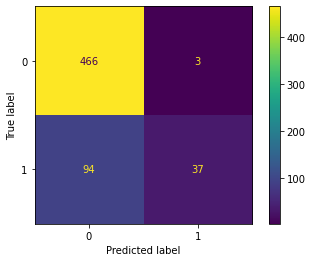

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,predictions))
disp.plot();

## Word clouds for different ratings

In [65]:
#Making a word cloud to see which words come up for different review ratings
from wordcloud import WordCloud

Now I have made some word clouds for the different ratings of the app. Here is the word cloud for reviews with a rating of 1.

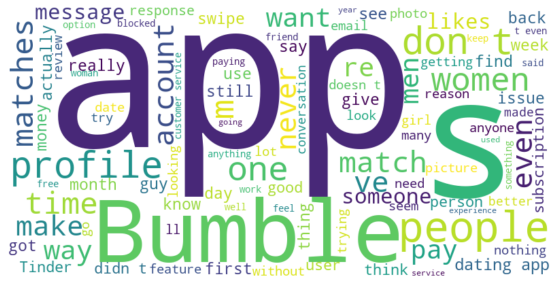

In [66]:
#All the text in the review column for reviews given a rating of 1
review_text = ' '.join(bumbleusdf2[bumbleusdf2['rating'] == 1]['review'])

#Get rid of stopwords and punctuation 
review_text = ' '.join(text_process(review_text))

#Creating the wordcloud object
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=100).generate(review_text)

#Display the word cloud 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Here is the word cloud for reviews with a rating of 5.

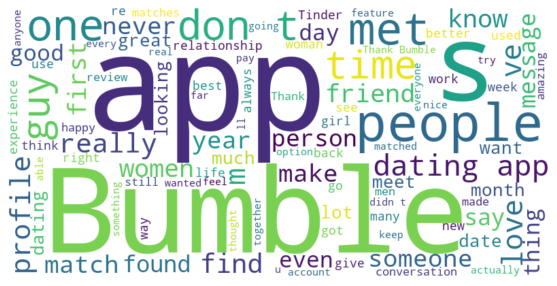

In [67]:
#All the text in the review column for reviews given a rating of 5
review_text = ' '.join(bumbleusdf2[bumbleusdf2['rating'] == 5]['review'])

#Get rid of stopwords and punctuation 
review_text = ' '.join(text_process(review_text))

#Creating the wordcloud object
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=100).generate(review_text)

#Display the word cloud 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Here is the word cloud for reviews with a rating of less than 4.

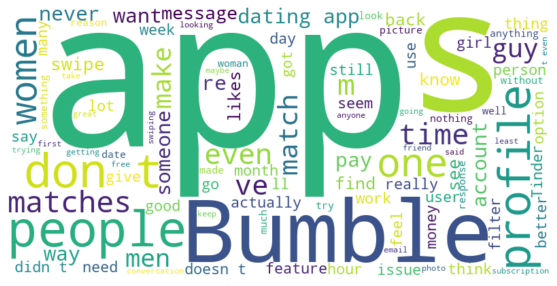

In [68]:
#All the text in the review column for reviews given a rating of less than 4 
review_text = ' '.join(bumbleusdf2[bumbleusdf2['4_or_more'] == 0]['review'])

#Get rid of stopwords and punctuation 
review_text = ' '.join(text_process(review_text))

#Creating the wordcloud object
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=100).generate(review_text)

#Display the word cloud 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Here is the word cloud for reviews with a rating of 4 or more.

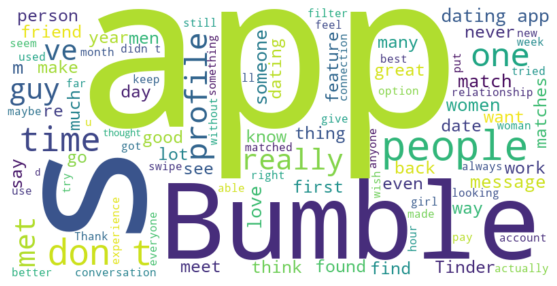

In [69]:
#All the text in the review column for reviews given a rating of 4 or more
review_text = ' '.join(bumbleusdf2[bumbleusdf2['4_or_more'] == 1]['review'])

#Get rid of stopwords and punctuation 
review_text = ' '.join(text_process(review_text))

#Creating the wordcloud object
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=100).generate(review_text)

#Display the word cloud 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()